In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from datetime import datetime
warnings.filterwarnings('ignore')

In [2]:
#importing the data
processed_data_path = os.path.join(os.path.pardir, '/Users/Acer','jupyterPro')
train_file_path = os.path.join(processed_data_path,"train.csv")
test_file_path = os.path.join(processed_data_path,"test.csv")

In [3]:
X = pd.read_csv(train_file_path)
y = pd.read_csv(test_file_path)

In [4]:
y.shape

(73096, 1)

In [5]:
X.shape

(73096, 10)

# SPLITTING THE DATA

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=0)

In [7]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (65786, 10)
Number transactions y_train dataset:  (65786, 1)
Number transactions X_test dataset:  (7310, 10)
Number transactions y_test dataset:  (7310, 1)


Dummy Model

Creating a dummy classifier

A dummy classifier is a type of classifier which does not generate any insight about the data and classifies the given data using only simple rules. The classifier’s behavior is completely independent of the training data as the trends in the training data are completely ignored and instead uses one of the strategies to predict the class label. It is used only as a simple baseline for the other classifiers i.e. any other classifier is expected to perform better on the given dataset. It is especially useful for datasets where are sure of a class imbalance. It is based on the philosophy that any analytic approach for a classification problem should be better than a random guessing approach.


In [8]:
strategies = ['most_frequent', 'stratified', 'uniform'] 
  
test_scores = [] 
for s in strategies: 
    #if s =='constant': 
       # dclf = DummyClassifier(strategy = s, random_state = 0) 
    #else: 
    dclf = DummyClassifier(strategy = s, random_state = 0) 
    dclf.fit(X_train, y_train) 
    score = dclf.score(X_test, y_test) 
    test_scores.append(score)

In [9]:
test_scores

[0.4807113543091655, 0.4987688098495212, 0.5175102599179207]

In [10]:
# accuracy score
print('accuracy for baseline model : {0:.2f}'.format(accuracy_score(y_test, dclf.predict(X_test))))

accuracy for baseline model : 0.52


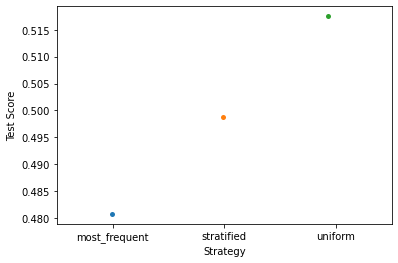

In [11]:
ax = sns.stripplot(strategies, test_scores); 
ax.set(xlabel ='Strategy', ylabel ='Test Score') 
plt.show()

# MODELS

Defining the helper function for k-fold and stratified k-fold cross validation

In [12]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 4)
skf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 4)

def model_classifier(model, X, y, cv):
    """
    Creates folds manually, perform 
    Returns an array of validation (recall) scores
    """
    scores = []
    
    
    for train_index,test_index in cv.split(X,y):
        X_train,X_test = X.loc[train_index],X.loc[test_index]
        y_train,y_test = y.loc[train_index],y.loc[test_index]

        # Fit the model on the training data
        model_obj = model.fit(X_train, y_train)
        y_pred = model_obj.predict(X_test)
        y_pred_prob = model_obj.predict_proba(X_test)[:,1]
        # Score the model on the validation data
        score = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        scores.append(score)
        mean_score = np.array(scores).mean()    

    print('Accuracy scores of the model: {:.2f}'.format(mean_score))
    print('\n Classification report of the model')
    print('--------------------------------------')
    print(report)
    
    print('\n Confusion Matrix of the model')
    print('--------------------------------------')
    print(conf_matrix)
    
    print("\n ROC Curve")
    
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure()
    val_model = input("Enter your model name: ")
    plt.plot(fpr, tpr, label= val_model + ' (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# LOGISTIC REGRESSION MODEL

In [13]:
# instantiating the model;
logregression = LogisticRegression()

Using k-fold

Accuracy scores of the model: 0.73

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      3636
           1       0.75      0.68      0.71      3673

    accuracy                           0.73      7309
   macro avg       0.73      0.73      0.72      7309
weighted avg       0.73      0.73      0.72      7309


 Confusion Matrix of the model
--------------------------------------
[[2822  814]
 [1192 2481]]

 ROC Curve
Enter your model name: Logistic_regreesion_model


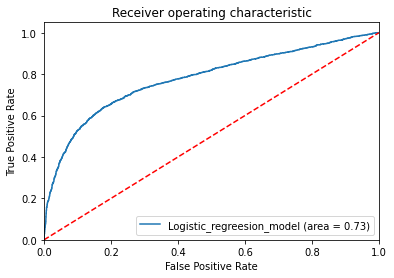

In [14]:
model_classifier(logregression, X, y,kf)

Using stratified k-fold

Accuracy scores of the model: 0.73

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      3654
           1       0.76      0.68      0.72      3655

    accuracy                           0.73      7309
   macro avg       0.74      0.73      0.73      7309
weighted avg       0.74      0.73      0.73      7309


 Confusion Matrix of the model
--------------------------------------
[[2876  778]
 [1171 2484]]

 ROC Curve
Enter your model name: Logistic_regression_model


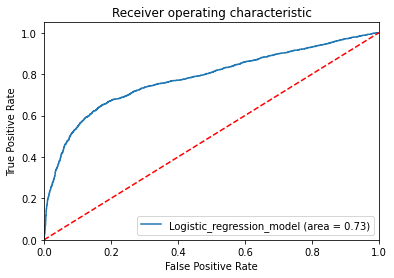

In [15]:
model_classifier(logregression, X, y,skf)

# XGBoost Model

In [16]:
#instantiating the model
xgb_regressor = XGBClassifier(eval_metric='mlogloss')

XGBoost using k-fold cross validation

Accuracy scores of the model: 0.84

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      3636
           1       0.86      0.81      0.84      3673

    accuracy                           0.84      7309
   macro avg       0.84      0.84      0.84      7309
weighted avg       0.84      0.84      0.84      7309


 Confusion Matrix of the model
--------------------------------------
[[3167  469]
 [ 704 2969]]

 ROC Curve
Enter your model name: XGBoost_model


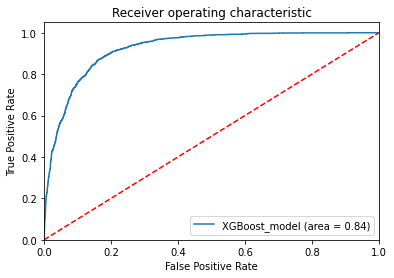

In [17]:
model_classifier(xgb_regressor,X,y,kf)

XGBoost using stratified k-fold cross validation


Accuracy scores of the model: 0.85

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      3654
           1       0.87      0.82      0.84      3655

    accuracy                           0.85      7309
   macro avg       0.85      0.85      0.85      7309
weighted avg       0.85      0.85      0.85      7309


 Confusion Matrix of the model
--------------------------------------
[[3206  448]
 [ 656 2999]]

 ROC Curve
Enter your model name: XGBoost_model


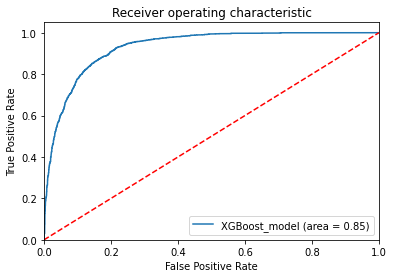

In [18]:
model_classifier(xgb_regressor,X,y,skf)

# MULTILAYER PERCEPTRON

A multilayer perceptron (MLP) is a feedforward artificial neural network that generates a set of outputs from a set of inputs. An MLP is characterized by several layers of input nodes connected as a directed graph between the input and output layers. MLP uses backpropogation for training the network. MLP is a deep learning method.

In [19]:
mlp = MLPClassifier()

MLP using k-fold

Accuracy scores of the model: 0.75

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      3636
           1       0.80      0.67      0.73      3673

    accuracy                           0.75      7309
   macro avg       0.76      0.75      0.75      7309
weighted avg       0.76      0.75      0.75      7309


 Confusion Matrix of the model
--------------------------------------
[[3027  609]
 [1203 2470]]

 ROC Curve
Enter your model name: MLP_Model


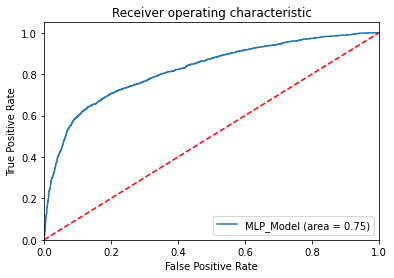

In [20]:
model_classifier(mlp,X,y,kf)

MLP using stratified k-fold

Accuracy scores of the model: 0.76

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.86      0.78      3654
           1       0.83      0.65      0.73      3655

    accuracy                           0.76      7309
   macro avg       0.77      0.76      0.75      7309
weighted avg       0.77      0.76      0.75      7309


 Confusion Matrix of the model
--------------------------------------
[[3153  501]
 [1277 2378]]

 ROC Curve
Enter your model name: MLP_Model


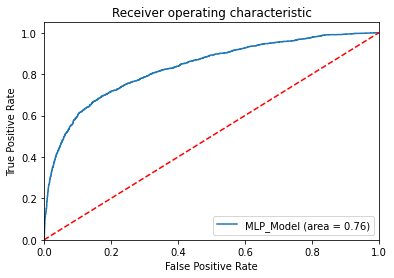

In [21]:
model_classifier(mlp,X,y,skf)

# RANDOM FOREST

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      3514
           1       0.95      1.00      0.98      3796

    accuracy                           0.97      7310
   macro avg       0.98      0.97      0.97      7310
weighted avg       0.97      0.97      0.97      7310

ROC_AUC_SCORE is 0.9723961297666477


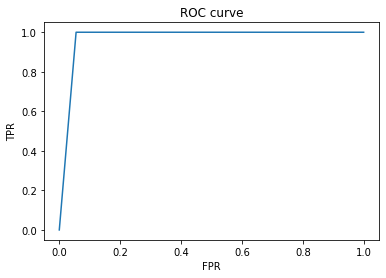

In [36]:
model = RandomForestClassifier()

model.fit(X_train, y_train)
y_scores = model.predict(X_test)
auc = roc_auc_score(y_test, y_scores)
print('Classification Report:')
print(classification_report(y_test,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()